***Iris Flower Classification***


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

***Load Dataset***

In [2]:
iris = load_iris()
X = iris.data
y = iris.target

feature_names = iris.feature_names
target_names = iris.target_names


df = pd.DataFrame(X, columns=feature_names)
df["species"] = y



 ***Train-Test Split***

In [3]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

***Models***

In [4]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Decision Tree": DecisionTreeClassifier(random_state=42)
}


**Training &** **Evaluation**

In [5]:
results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    results[name] = acc

    print(f"\n{name}")
    print("Accuracy:", acc)
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n",
          classification_report(y_test, y_pred, target_names=target_names))



Logistic Regression
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


KNN
Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30


Decision Tree
Accuracy:

**Accuracy Comparison Plot**

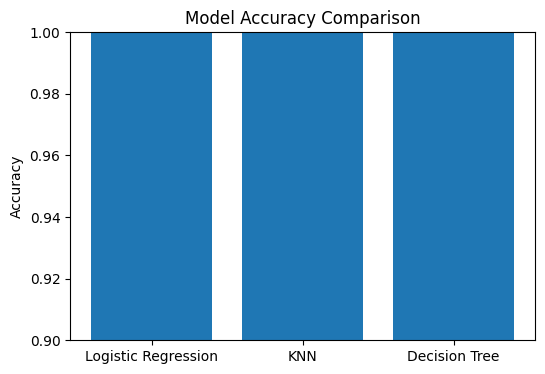

In [6]:
plt.figure(figsize=(6,4))
plt.bar(results.keys(), results.values())
plt.ylabel("Accuracy")
plt.title("Model Accuracy Comparison")
plt.ylim(0.9, 1.0)
plt.show()


Sample **Prediction**

In [7]:
sample = [[5.1, 3.5, 1.4, 0.2]]
model = models["Logistic Regression"]
prediction = model.predict(sample)

print("Sample Prediction:", target_names[prediction[0]])

Sample Prediction: setosa
